# INTRODUCTION

## What is sepsis?

Sepsis is a life-threatening condition that arises when the body's response to an infection causes injury to its own tissues and organs. The immune system releases chemicals into the bloodstream to fight an infection, but this triggers inflammation throughout the entire body.

The inflammation that occurs during sepsis can trigger a cascade of changes that damage multiple organ systems, causing them to fail. This can lead to tissue damage, organ failure and even death if not treated promptly.

### Key points about sepsis:

* Infection Trigger: Sepsis typically begins with an infection, which can be bacterial, viral, fungal, or parasitic. Common sources of infection include the lungs (pneumonia), urinary tract, abdomen, or skin.

* Systemic Response: The body's immune system, instead of effectively fighting the infection, goes into overdrive, releasing a cascade of chemicals into the bloodstream. This widespread inflammation can lead to various organ dysfunctions.

* Symptoms: Symptoms of sepsis can include fever, chills, rapid heartbeat, rapid breathing, low blood pressure, confusion, and other signs of organ dysfunction.

* Risk Factors: Anyone can develop sepsis, but certain individuals are at higher risk, including the very young, the elderly, those with weakened immune systems, and individuals with chronic medical conditions.

* Emergency Medical Condition: Sepsis is a medical emergency that requires prompt and aggressive treatment. Early detection and intervention significantly improve the chances of survival.

* Treatment: Treatment involves addressing the underlying infection with antibiotics or antiviral medications, along with supportive care to stabilize vital functions. In severe cases, patients may require admission to an intensive care unit (ICU).

#**DATA UNDERSTANDING**

ID: number to represent patient ID

PRG: Plasma glucose
*  It provides information about a person's blood sugar levels
* Inflammatory response can lead to an increase in blood glucose levels, resulting in hyperglycemia.
* Studies have shown that hyperglycemia is common in patients with sepsis

PL: Blood Work Result-1 (mu U/ml)
* When evaluating blood work results in the context of sepsis, when parameters show abnormalities, including elevated or increase in the parameter's results this is an indication of an inflammatory response.

PR: Blood Pressure (mm Hg)
* Sepsis can lead to a significant drop in blood pressure, a condition known as septic shock.
* While hypotension is a common feature of septic shock, it is worth noting that some individuals may experience a hypertensive response during sepsis.
* This hypertensive response is characterized by an increase in blood pressure above normal levels.

SK: Blood Work Result-2 (mm)
* When evaluating blood work results in the context of sepsis, when parameters show abnormalities, including elevated or increase in the parameter's results this is an indication of an inflammatory response.

TS: Blood Work Result-3 (mu U/ml)
* When evaluating blood work results in the context of sepsis, when parameters show abnormalities, including elevated or increase in the parameter's results this is an indication of an inflammatory response.

M11: Body mass index (weight in kg/(height in m)^2
* BMI, or Body Mass Index, is a measure that assesses an individual's body weight in relation to their height.

BD2: Blood Work Result-4 (mu U/ml)
* When evaluating blood work results in the context of sepsis, when parameters show abnormalities, including elevated or increase in the parameter's results this is an indication of an inflammatory response.

Age: patients age (years)

Insurance: If a patient holds a valid insurance card

Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [68]:
!pip3 install -q fastapi[all]

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [69]:
# Data handling
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt # For plots
import seaborn as sns # For plots

# EDA (pandas-profiling, etc. )
...

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.preprocessing import StandardScaler


# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline



# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import GridSearchCV

#Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report

# Other packages
import os, pickle


In [70]:
#from google.colab import drive
#drive.mount('/content/drive')

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [71]:
test = pd.read_csv('dataset\Paitients_Files_Test.csv')
train = pd.read_csv('dataset\Paitients_Files_Train.csv')

In [72]:
test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [73]:
train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.



In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [76]:
# Calculate basic descriptive statistics
print(train.describe())


              PRG          PL          PR          SK          TS         M11  \
count  599.000000  599.000000  599.000000  599.000000  599.000000  599.000000   
mean     3.824708  120.153589   68.732888   20.562604   79.460768   31.920033   
std      3.362839   32.682364   19.335675   16.017622  116.576176    8.008227   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   64.000000    0.000000    0.000000   27.100000   
50%      3.000000  116.000000   70.000000   23.000000   36.000000   32.000000   
75%      6.000000  140.000000   80.000000   32.000000  123.500000   36.550000   
max     17.000000  198.000000  122.000000   99.000000  846.000000   67.100000   

              BD2         Age   Insurance  
count  599.000000  599.000000  599.000000  
mean     0.481187   33.290484    0.686144  
std      0.337552   11.828446    0.464447  
min      0.078000   21.000000    0.000000  
25%      0.248000   24.000000    0.000000  
50%   

We observed from the two dataset(train,test) that there's a total of 10 columns in test and 11 columns in train. There also doesn't seem to be any missing values present with the Sepsis column being the target column. Sepsis is also misspelt in the train dataset; which we would correct after

In [77]:
# Rename the 'Sepssis' column to 'Sepsis'
train.rename(columns={'Sepssis': 'Sepsis'}, inplace=True)

In [78]:
train.duplicated().sum()

0

## **In Summary**

| Column    | Missingness | DataType    |
|-----------|-------------|-------------|
| PRG       | Complete    | Continuous  |
| PL        | Complete    | Continuous  |
| PR        | Complete    | Continuous  |
| SK        | Complete    | Continuous  |
| TS        | Complete    | Continuous  |
| M11       | Complete    | Continuous  |
| BD2       | Complete    | Continuous  |
| AGE       | Complete    | Discrete    |
| INSURANCE | Complete    | Categorical |
| SEPSIS    | Complete    | Categorical |


#**OBJECTIVE**

The objective of this project is to develop a machine learning model API that, based on certain factors, assesses whether an individual is susceptible to sepsis.

##**QUESTIONS**

1. Is there a significant difference in blood pressure between patients who develop sepsis and those who do not?

2. Do the various blood work results (PL, SK, TS, BD2) correlate with the occurrence of sepsis?

3. What is the distribution of ages among patients who develop sepsis compared to those who do not?

4. Does the presence of valid insurance (Insurance) affect the likelihood of sepsis in ICU patients?

5. Which attributes contributes most significantly to determine whether an individual would get sepsis or not?

6. Is there a significant correlation between BMI and the occurrence of sepsis?

7. Are certain BMI ranges more prone to sepsis?

8. Does the distribution of plasma glucose or blood pressure differ significantly between the two groups?


#**HYPOTHESIS**


**Null Hypothesis (H0)**:

There is no significant difference in the mean age between patients who develop sepsis in the ICU and those who do not.

**Alternate Hypothesis (H1)**:

There is a significant difference in the mean age between patients who develop sepsis in the ICU and those who do not.


## Univariate Analysis
Here is the section to explore, analyze, visualize each variable independently of the others.

In [79]:
print(train['Age'].value_counts().head(10))


Age
22    52
21    52
25    40
24    37
23    27
29    27
28    26
26    25
27    21
41    20
Name: count, dtype: int64


From the descriptive statistic garthered earlier on, we were informed that the age range of these patients were between 21-81 years of age. But now we know that from the output above, majority of these patients were in their twenties with 104 being 21 and 22

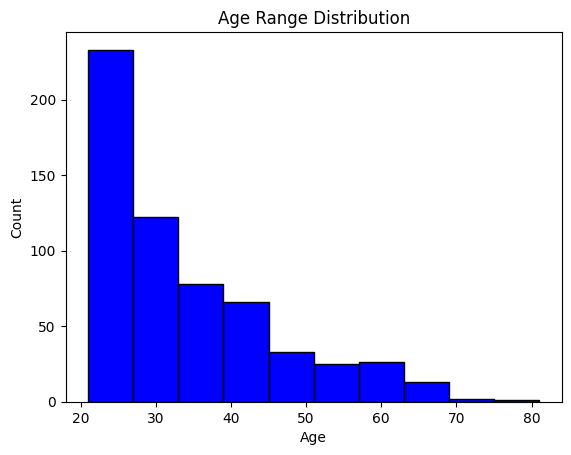

In [80]:
# Plotting the age range histogram
plt.hist(train['Age'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Range Distribution')
plt.show()

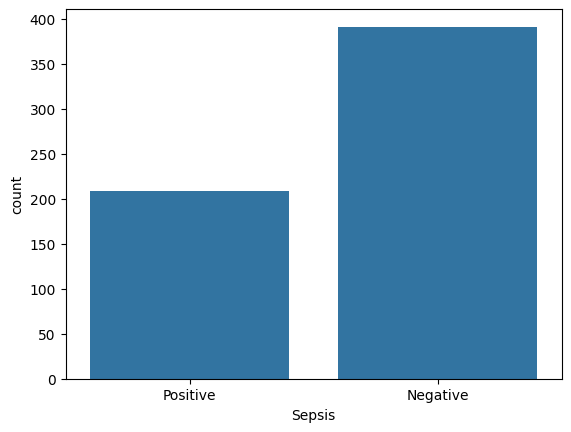

In [81]:
# Distribution of Target Variable (Sepsis)
sns.countplot(x='Sepsis', data=train)
plt.show()

In [82]:
sepsis_count = train['Sepsis'].value_counts()
print(sepsis_count)

Sepsis
Negative    391
Positive    208
Name: count, dtype: int64


In [83]:
# Calculate the percentage
total_patients = len(train)
percentage_negative = (sepsis_count['Negative'] / total_patients) * 100
percentage_positive = (sepsis_count['Positive'] / total_patients) * 100

# Print the results
print(f"Percentage of patients with Negative result: {percentage_negative:.2f}%")
print(f"Percentage of patients with Positive result: {percentage_positive:.2f}%")

Percentage of patients with Negative result: 65.28%
Percentage of patients with Positive result: 34.72%


Interpreting these results:
* Approximately 65.28% of the admitted persons in the dataset had a negative sepsis classification.
* Approximately 34.72% of the admitted persons in the dataset had a positive sepsis classification.

Based on the result, it appears that the given output of sepsis results does indicate a class imbalance.This indicates that the negative class is more prevalent, while the positive class is less represented.  

Class imbalance refers to a situation where the number of instances in one class is significantly higher or lower than the number of instances in another class.



In [84]:
selected_columns = ['PRG','PR', 'SK', 'Insurance']

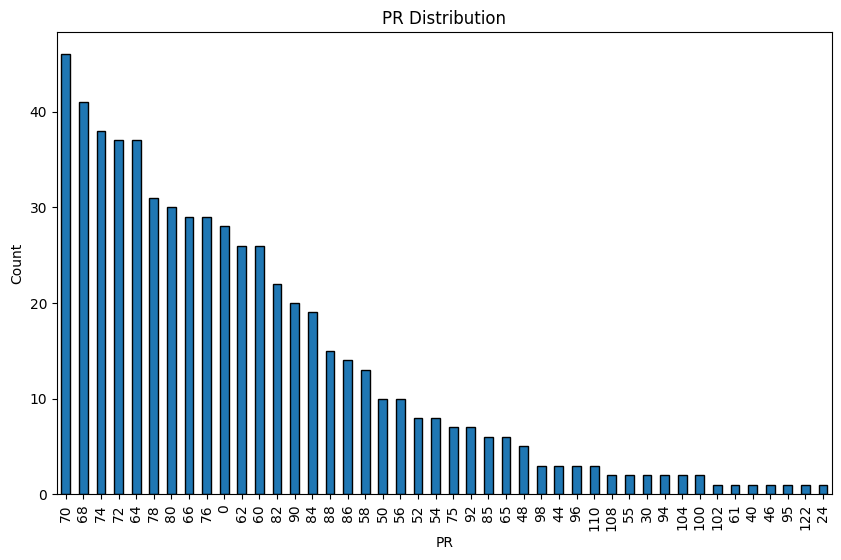

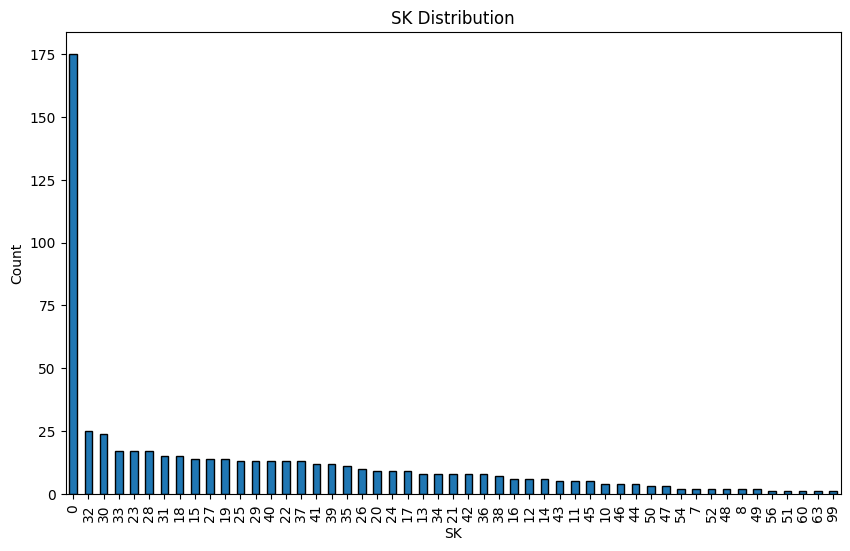

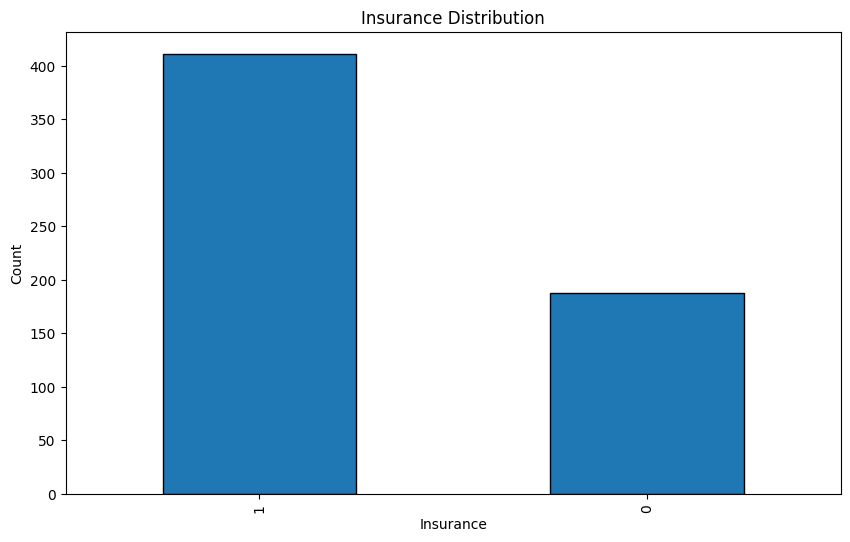

In [85]:
# Display other columns
for column in selected_columns[1:]:
    plt.figure(figsize=(10, 6))
    train[column].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

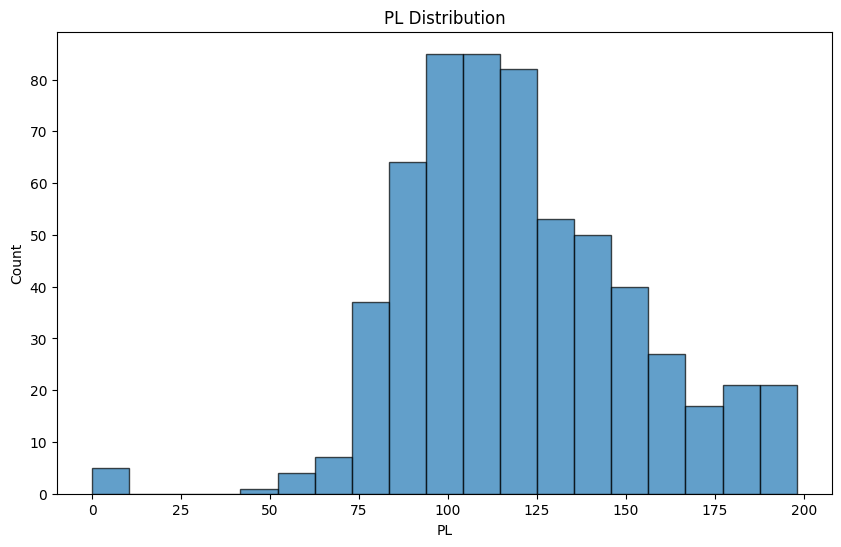

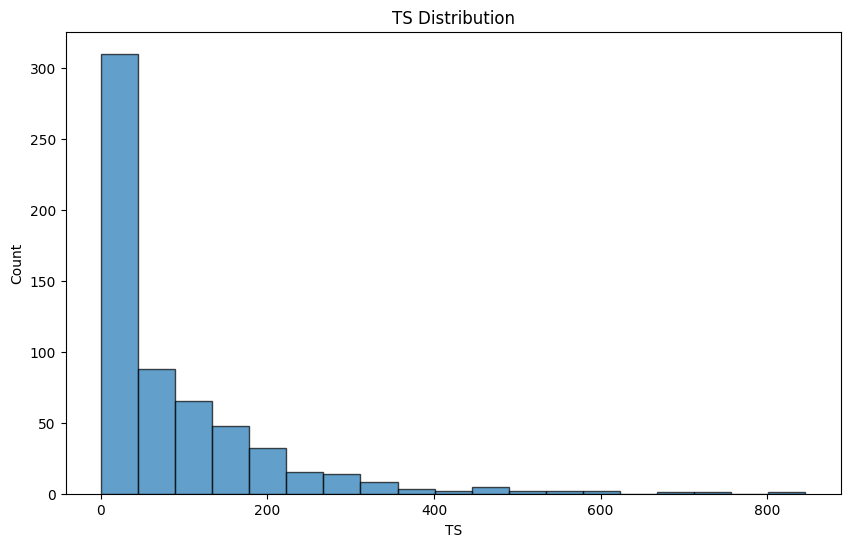

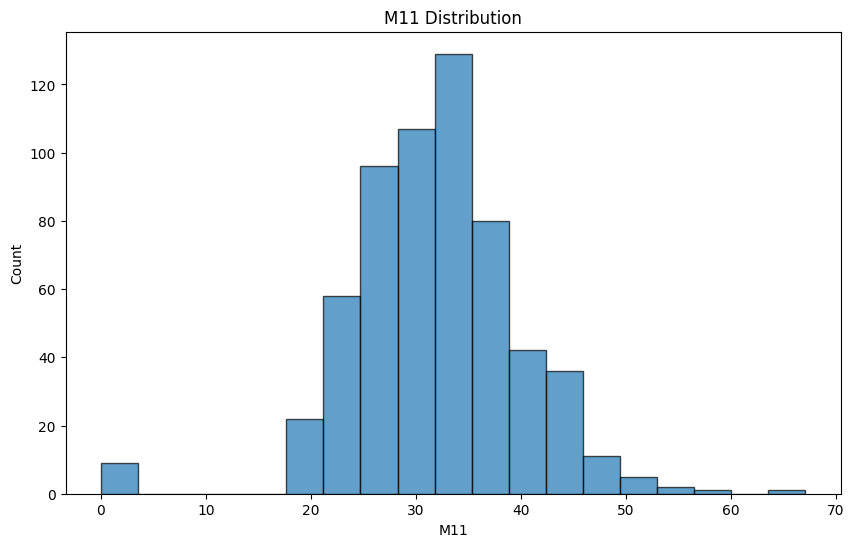

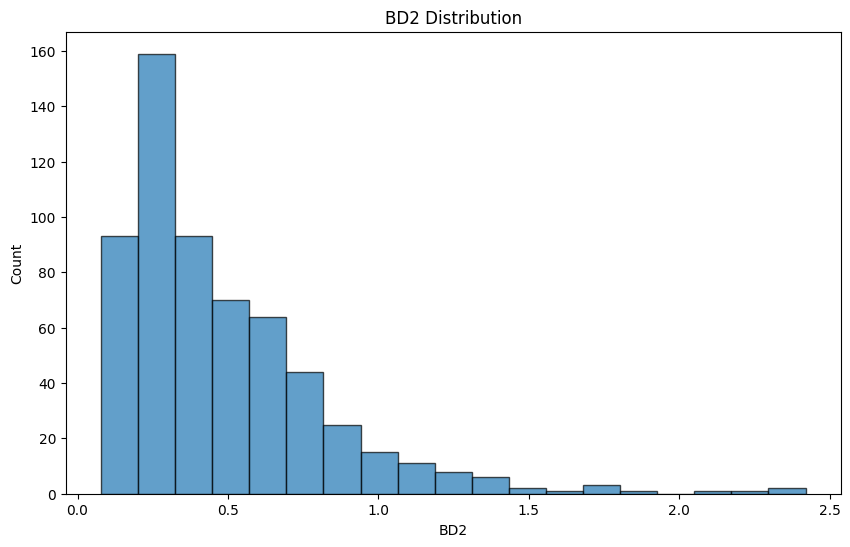

In [86]:
specified_attributes = ['PL', 'TS', 'M11', 'BD2']

for column in specified_attributes:
    plt.figure(figsize=(10, 6))

    # Use a histogram for the specified attributes with specified ranges
    bins = np.linspace(train[column].min(), train[column].max(), 20)
    plt.hist(train[column], bins=bins, edgecolor='black', alpha=0.7)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

From the graphs as seen above we realise that there's some skewness, most prodominantly positive skew, going on with the dataset.

Skewness quantifies the extent to which a distribution deviates from being symmetrical.It indicates whether the data is concentrated more on one side of the mean than the other.

Also, from the descriptive statistics and graph plots of the train set there are some columns that have entries with value of 0 - PRG, PL, PR, SK, TS, and M11. From research and common knowledge, these columns should not have a value of 0. Therefore, it is reasonable to assume that any missing value was filled out with 0.

In [87]:
def count_missing_val(df, cols):
  print('\tMissing val Count\tMissing val Percentage')
  for col in cols:
    missing_cnt = df[col].value_counts()[0]
    missing_percentage = round((missing_cnt/len(df) * 100), 2)
    print(str(col) + ': \t\t' + str(missing_cnt) + '\t\t\t' + str(missing_percentage).zfill(5) + '\t%')

In [88]:
count_missing_val(train, ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11'])

	Missing val Count	Missing val Percentage
PRG: 		93			15.53	%
PL: 		5			00.83	%
PR: 		28			04.67	%
SK: 		175			29.22	%
TS: 		289			48.25	%
M11: 		9			001.5	%


## Bivariate & Multivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others.

In [89]:
# Data Distribution - Numerical Variables
numerical_cols = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']


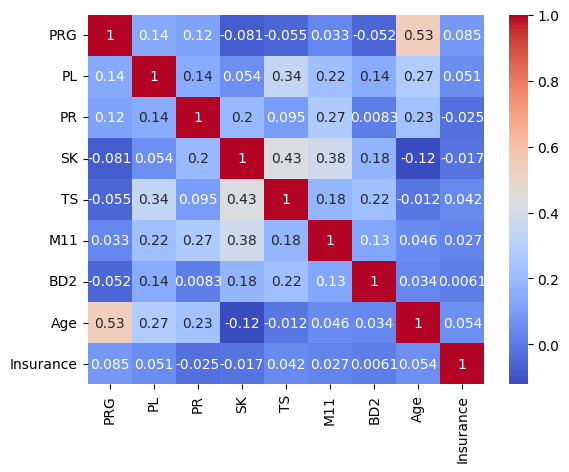

In [90]:
# Correlation Analysis
correlation_matrix = train[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

A correlation matrix is a statistical tool that shows how strong and in what direction two or more variables are related. Correlation matrix tells us how strongly the independent variables in a model are related to each other

* There is a moderate positive correlation (0.53) between plasma glucose levels and age. This suggests that as age increases, plasma glucose levels tend to increase as well.
*A positive correlation of 0.34 suggests that there is a moderate tendency for Blood Work Result-1 and Blood Work Result-3 to increase together.
*There is a weak positive correlation (0.27) between blood pressure and body mass index. This suggests that as body mass index increases, blood pressure tends to increase as well.
* There is a moderate positive correlation (0.43) between blood work result 2 and blood work result 3. This implies that these two blood work results tend to increase or decrease together.
*There is a moderate positive correlation (0.38) between body mass index and blood work result 2. This suggests that as body mass index increases, blood work result 2 tends to increase as well.
*There is a weak positive correlation (0.22) between blood work result 4 and blood work result 3. This implies that these two blood work results tend to increase or decrease together, although the correlation is relatively weak.

In conclusion, we realise that Insurance doesn't really have much in common or affect the other variables. Also the various blood work results are interdependent on each other although this relation is not really strong. Furthermore, The only moderately strong relationship is that of the plasma glucose levels and age.

### Q1. Is there a significant difference in blood pressure between patients who develop sepsis and those who do not?



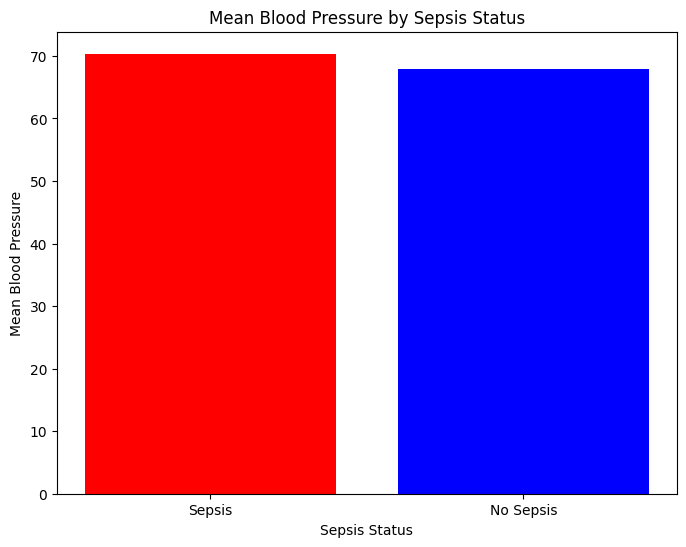

In [91]:
sepsis_mean = train[train['Sepsis'] == 'Positive']['PR'].mean()
no_sepsis_mean = train[train['Sepsis'] == 'Negative']['PR'].mean()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Sepsis', 'No Sepsis'], [sepsis_mean, no_sepsis_mean], color=['red', 'blue'])
plt.title('Mean Blood Pressure by Sepsis Status')
plt.xlabel('Sepsis Status')
plt.ylabel('Mean Blood Pressure')
plt.show()

The different colors represent the two groups, and the height of each bar represents the mean blood pressure for that group. From the output we can see that there's no much significant difference between the two groups height hence there's no significant difference in blood pressure between patients who develop sepsis and those who do not.

### Q2. Do the various blood work results (PL, SK, TS, BD2) correlate with the occurrence of sepsis?



A statistical tests for analyzing the relationship between a categorical variable and a numerical variable is the analysis of variance (ANOVA). And this is evident with the variables in question i.e the 4 blood work results and the Sepsis variable.  

In [92]:
import scipy.stats as stats

# Split the data into 2 groups based on the 'sepsis' variable
group1 = train[train['Sepsis'] == 'Positive']['PL']
group2 = train[train['Sepsis'] == 'Negative']['PL']


# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2)

# Print the F-statistic and p-value
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 151.352353968516
p-value: 3.678522495138464e-31


In [93]:

# Split the data into 2 groups based on the 'sepsis' variable
group1 = train[train['Sepsis'] == 'Positive']['SK']
group2 = train[train['Sepsis'] == 'Negative']['SK']


# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2)

# Print the F-statistic and p-value
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 3.4303278392362646
p-value: 0.06450285034380873


In [94]:

# Split the data into 2 groups based on the 'sepsis' variable
group1 = train[train['Sepsis'] == 'Positive']['TS']
group2 = train[train['Sepsis'] == 'Negative']['TS']


# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2)

# Print the F-statistic and p-value
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 12.983126998162588
p-value: 0.0003405167334141228


In [95]:

# Split the data into 2 groups based on the 'sepsis' variable
group1 = train[train['Sepsis'] == 'Positive']['BD2']
group2 = train[train['Sepsis'] == 'Negative']['BD2']


# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2)

# Print the F-statistic and p-value
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 20.350650566313952
p-value: 7.765417586404257e-06


From the above output conducted with the various tests, we can conlude that
* Since we have quite a large f-statistics score, and an extremely small p-value of 3.678522495138464e-31 which is less than the typical significance level of 0.05. We can say that, there's likely a significant association between the 'PL' numerical variable and the 'sepsis' categorical variable.

* In the second Anova test to check for a relation between SK and sepsis variables, we noticed that in this case, the p-value of 0.06450285034380873 is greater than the typical significance level of 0.05. hence enough grounds to suggest that there may not be a statistically significant difference between the groups i.e a association between sepsis and the sk blood work results.

* With this instance, the p-value of 0.0003405167334141228 is less than the typical significance level of 0.05. Therefore, we can conclude that there is strong evidence which implies a significant association between the variables being tested.

* Finally in the last test, the p-value of  7.765417586404257e-06 is less than the typical significance level of 0.05. Therefore, we can conclude that there is strong evidence which implies a significant association between the variables being tested.

In short, we say that blood work results PL (platelet count), TS (total solids), and BD2 (base deficit) have a strong relation or association with sepsis . While SK (serum potassium) does not have and relation to sepsis.

### Q3. What is the distribution of ages among patients who develop sepsis compared to those who do not?



Density plots are primarily used to visualize the distribution of a continuous variable.

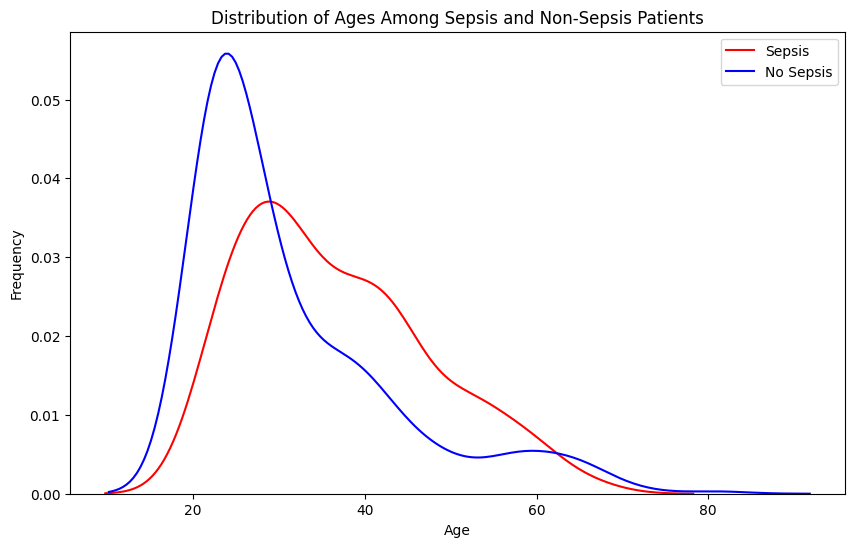

In [96]:
# Separate the data into two groups: patients with sepsis and patients without sepsis
sepsis_patients = train[train['Sepsis'] == 'Positive']
no_sepsis_patients = train[train['Sepsis'] == 'Negative']

# Create a density plot to compare the distribution of ages
plt.figure(figsize=(10, 6))

sns.kdeplot(sepsis_patients['Age'], label='Sepsis', color='red')
sns.kdeplot(no_sepsis_patients['Age'], label='No Sepsis', color='blue')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages Among Sepsis and Non-Sepsis Patients')
plt.legend()
plt.show()


The density chart above shows the distribution of ages among sepsis and non-sepsis patients. The red line represents the sepsis patients, and the blue line represents the non-sepsis patients.

The density chart shows that the distribution of ages for sepsis patients is shifted to the right compared to the distribution of ages for non-sepsis patients. This means that sepsis patients are generally older than non-sepsis patients.

The density chart also shows that there is a larger overlap between the two distributions at the younger ages. This means that there are some sepsis patients who are younger than some non-sepsis patients. However, the overall trend is that sepsis patients are older than non-sepsis patients.

### Q4. Does the presence of valid insurance (Insurance) affect the likelihood of sepsis in ICU patients?



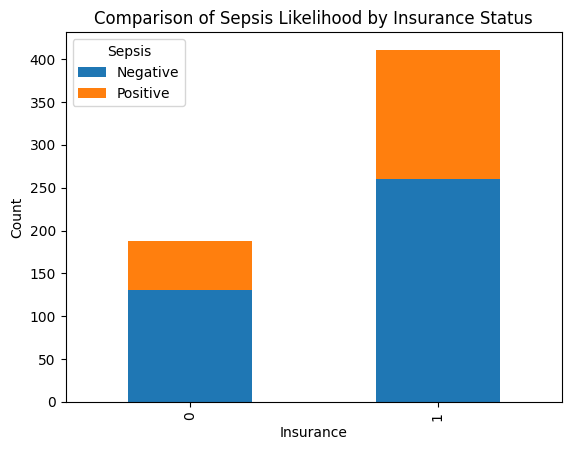

In [97]:
# 2. Group the data based on insurance and sepsis status
grouped_data = train.groupby(['Insurance', 'Sepsis']).size().unstack()

# 3. Create the stacked bar chart
grouped_data.plot(kind='bar', stacked=True)

# 4. Customize the chart
plt.xlabel('Insurance')
plt.ylabel('Count')
plt.title('Comparison of Sepsis Likelihood by Insurance Status')
plt.legend(title='Sepsis')

# 5. Show the chart
plt.show()

In [98]:
# Calculate the percentage of patients with sepsis and insurance, sepsis and no insurance, no sepsis and insurance, no sepsis and no insurance

total_count = len(train)

# Sepsis and Insurance
insurance_sepsis = (train[(train['Insurance'] == 1) & (train['Sepsis'] == 'Positive')].shape[0] / total_count) * 100
print(f"Percentage of patients with sepsis and insurance: {insurance_sepsis}%")

# Sepsis and No Insurance
no_insurance_sepsis = (train[(train['Insurance'] == 0) & (train['Sepsis'] == 'Positive')].shape[0] / total_count) * 100
print(f"Percentage of patients with sepsis and no insurance: {no_insurance_sepsis}%")

# No Sepsis and Insurance
insurance_no_sepsis = (train[(train['Insurance'] == 1) & (train['Sepsis'] == 'Negative')].shape[0] / total_count) * 100
print(f"Percentage of patients with no sepsis and insurance: {insurance_no_sepsis}%")

# No Sepsis and No Insurance
no_insurance_no_sepsis = (train[(train['Insurance'] == 0) & (train['Sepsis'] == 'Negative')].shape[0] / total_count) * 100
print(f"Percentage of patients with no sepsis and no insurance: {no_insurance_no_sepsis}%")


Percentage of patients with sepsis and insurance: 25.208681135225376%
Percentage of patients with sepsis and no insurance: 9.515859766277128%
Percentage of patients with no sepsis and insurance: 43.40567612687813%
Percentage of patients with no sepsis and no insurance: 21.869782971619365%


The bar chart illustrates the relationship between insurance status and the prevalence of sepsis among ICU patients.The left bar represents patients without insurance (Insurance = 0), while the right bar represents patients with insurance (Insurance = 1). Within each bar, the blue portion indicates the proportion of patients without sepsis, while the orange portion indicates the proportion of patients with sepsis.

* The percentage of patients with sepsis and insurance (25.21%) is higher than the percentage of patients with sepsis and no insurance (9.52%). This suggests that having insurance may not necessarily protect against sepsis.
* Also, a significant portion of patients (approximately 65%) do not develop sepsis, regardless of insurance status. This indicates that sepsis is not a universal outcome for ICU patients.

###Q5. Which attributes contributes most significantly to determine whether an individual would get sepsis or not?

###Q6. Is there a significant correlation between BMI and the occurrence of sepsis?

In [99]:
from scipy.stats import f_oneway
# Group the BMI values by the different categories of sepsis
sepsis_categories = train['Sepsis'].unique()
grouped_bmi = [train[train['Sepsis'] == category]['M11'] for category in sepsis_categories]

# Perform the ANOVA test
f_statistic, p_value = f_oneway(*grouped_bmi)

# Print the F-statistic and p-value
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 66.1777664049268
P-value: 2.3972519626647427e-15



Based on the results, the F-statistic is 66.1777664049268 and the p-value is 2.3972519626647427e-15. This indicates that there is a statistically significant difference in BMI values between the different categories of sepsis (p < 0.05).

In other words, there is a strong relationship between BMI and the likelihood of developing sepsis. Patients with higher BMI values are more likely to experience sepsis compared to those with lower BMI values.

###Q7. Are certain BMI ranges more prone to sepsis?



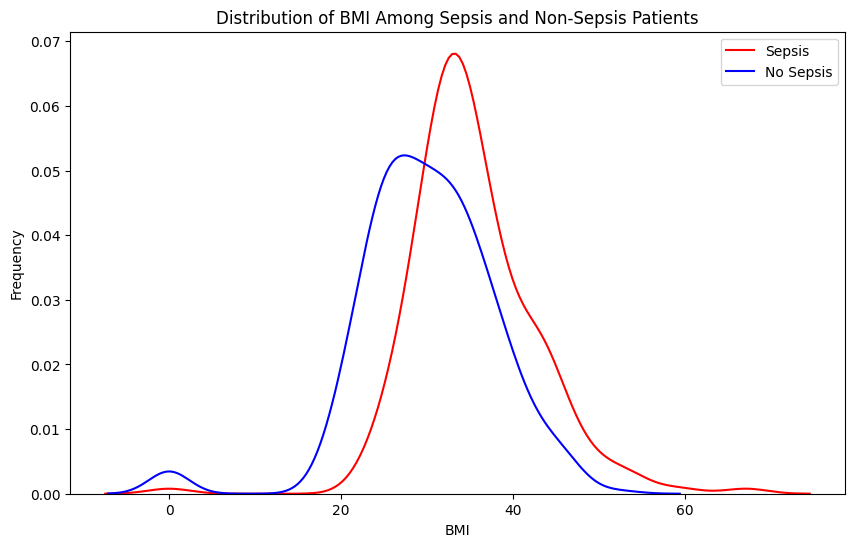

In [100]:
# Separate the data into two groups: patients with sepsis and patients without sepsis
sepsis_patients = train[train['Sepsis'] == 'Positive']
no_sepsis_patients = train[train['Sepsis'] == 'Negative']

# Create a density plot to compare the distribution of ages
plt.figure(figsize=(10, 6))

sns.kdeplot(sepsis_patients['M11'], label='Sepsis', color='red')
sns.kdeplot(no_sepsis_patients['M11'], label='No Sepsis', color='blue')

plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI Among Sepsis and Non-Sepsis Patients')
plt.legend()
plt.show()

 The chart shows the distribution of BMI (body mass index) among septic and non-septic patients. The red line represents the distribution of BMI among patients with sepsis, while the blue line represents the distribution of BMI among patients without sepsis.

A higher proportion of patients with sepsis have a BMI between 30 and 40 kg/m², compared to patients without sepsis. This suggests that obesity may be a risk factor for sepsis.

Additionally, the peak of the distribution for patients with sepsis is slightly higher than for patients without sepsis, indicating that the average BMI among septic patients may be slightly higher.

###Q8. Does the distribution of plasma glucose or blood pressure differ significantly between the two groups?

In [101]:
from scipy.stats import ttest_ind

plasma_glucose = train[train['Sepsis'] == 'Positive']['PRG']
non_sepsis_plasma_glucose = train[train['Sepsis'] == 'Negative']['PRG']

blood_pressure = train[train['Sepsis'] == 'Positive']['PR']
non_sepsis_blood_pressure = train[train['Sepsis'] == 'Negative']['PR']

# Perform t-test for Plasma Glucose
t_stat_plasma_glucose, p_value_plasma_glucose = ttest_ind(plasma_glucose, non_sepsis_plasma_glucose)

# Perform t-test for Blood Pressure
t_stat_blood_pressure, p_value_blood_pressure = ttest_ind(blood_pressure, non_sepsis_blood_pressure)

# Print the t-statistic and p-value for Plasma Glucose
print(f'Test for Plasma Glucose: t-stat = {t_stat_plasma_glucose}, p-value = {p_value_plasma_glucose}')

# Print the t-statistic and p-value for Blood Pressure
print(f'Test for Blood Pressure: t-stat = {t_stat_blood_pressure}, p-value = {p_value_blood_pressure}')


Test for Plasma Glucose: t-stat = 5.172721512358376, p-value = 3.154172341568826e-07
Test for Blood Pressure: t-stat = 1.495353813655633, p-value = 0.1353505282559576



The t-test results show that there is a statistically significant difference in plasma glucose levels between septic and non-septic patients (p-value < 0.05). The t-statistic of 5.17 indicates that the average plasma glucose level is higher in septic patients than in non-septic patients.

However, there is no statistically significant difference in blood pressure levels between septic and non-septic patients (p-value > 0.05). The t-statistic of 1.49 indicates that the average blood pressure level is slightly higher in septic patients than in non-septic patients, but this difference is not statistically significant.

### HYPOTHESIS
* Null Hypothesis (H0):
There is no significant difference in the mean age between patients who develop sepsis in the ICU and those who do not.
* Alternate Hypothesis (H1):
There is a significant difference in the mean age between patients who develop sepsis in the ICU and those who do not.

In [102]:
import scipy.stats as stats
import numpy as np

ages_sepsis = train[train['Sepsis'] == 'Positive']['Age']
ages_no_sepsis = train[train['Sepsis'] == 'Negative']['Age']

# Perform independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(ages_sepsis, ages_no_sepsis)

# Set the significance level (alpha)
alpha = 0.05

# Compare p-value to alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean age.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean age.")


Reject the null hypothesis. There is a significant difference in mean age.


In [103]:
import scipy.stats as stats
import pandas as pd

# Separate the data into two groups based on sepsis status
sepsis_group = train[train['Sepsis'] == 'Positive']
no_sepsis_group = train[train['Sepsis'] == 'Negative']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(sepsis_group['Age'], no_sepsis_group['Age'])

# Compare the p-value with the significance level (alpha = 0.05)
significance_level = 0.05
if p_value < significance_level:
    print("Reject the null hypothesis. There is a significant difference in the mean age between sepsis and non-sepsis groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean age between sepsis and non-sepsis groups.")

Reject the null hypothesis. There is a significant difference in the mean age between sepsis and non-sepsis groups.


# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

* During the Multivariate analysis, we realized that during the correlation of the dataset, having insurance or not doesn't really determine if a patient is going to get sepsis. And since we are processing the dataset for model, it would have to go.

* Also, the Id column is more a redundant feature as it does not have any predictive value.This column would also have to go to prevent any data leakage.

In [104]:
train_df = train.copy()

In [105]:
# Drop ID (both sets) and Insurance (test set) columns
train_df.drop(columns=['ID', 'Insurance'], axis='columns', inplace=True)
test.drop(columns=['Insurance'], axis='columns', inplace=True)

In [106]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRG     599 non-null    int64  
 1   PL      599 non-null    int64  
 2   PR      599 non-null    int64  
 3   SK      599 non-null    int64  
 4   TS      599 non-null    int64  
 5   M11     599 non-null    float64
 6   BD2     599 non-null    float64
 7   Age     599 non-null    int64  
 8   Sepsis  599 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 42.2+ KB


In [107]:
train_df = train_df.replace('M11', 'BMI')
train_df = train_df.replace('PR', 'Blood_Pressure')
train_df = train_df.replace('PRG', 'Plasma_glucose')


In [108]:
train_df['Sepsis'].unique()

array(['Positive', 'Negative'], dtype=object)

For binary categorical variables, as seen from the output above, values are mapped to numerical representations using label encoding. In label encoding, each category is assigned a unique numerical value (e.g., 0 for "negative" and 1 for "positive"). This encoding preserves the information that there are only two possible outcomes for the variable.

In [109]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
train_df['Sepsis'] = label_encoder.fit_transform(train['Sepsis'])


In [110]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRG     599 non-null    int64  
 1   PL      599 non-null    int64  
 2   PR      599 non-null    int64  
 3   SK      599 non-null    int64  
 4   TS      599 non-null    int64  
 5   M11     599 non-null    float64
 6   BD2     599 non-null    float64
 7   Age     599 non-null    int64  
 8   Sepsis  599 non-null    int32  
dtypes: float64(2), int32(1), int64(6)
memory usage: 39.9 KB


Although there are no missing values as seen from the output of the data info above, we do remember that in the beginning we said the was a high possibility that these missing values might be replaced by zero as some parameters could just not have that value when we look at their ranges.

Also, we relaised from plotting these features that majority of these variables were skewed and this can also be due to outliers being present in the dataset.

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(-200.0, 0, '−200'),
  Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000')])

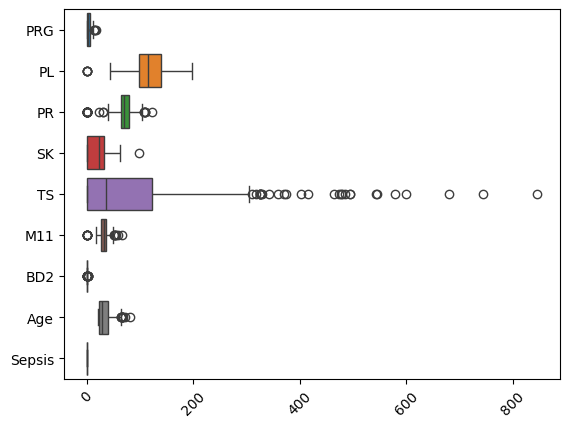

In [111]:
#checking for outliers
# Box Plot for numerical features
sns.boxplot(data=train_df, orient='h')
plt.xticks(rotation=45)

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 [Text(-100.0, 0, '−100'),
  Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600')])

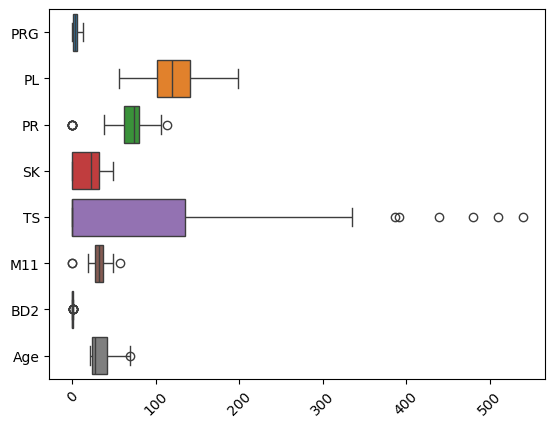

In [112]:
#checking for outliers
# Box Plot for numerical features
sns.boxplot(data=test, orient='h')
plt.xticks(rotation=45)

Since we see that some outliers are present in the dataset, we can first start taking care of the missing values of the dataset i.e. the 0's.

 0 can have a significant impact on the mean, zero values will be replaced with the column's median.

In [113]:
train_df.min()

PRG        0.000
PL         0.000
PR         0.000
SK         0.000
TS         0.000
M11        0.000
BD2        0.078
Age       21.000
Sepsis     0.000
dtype: float64

In [114]:
test.min()

ID     ICU200609
PRG            0
PL            56
PR             0
SK             0
TS             0
M11          0.0
BD2          0.1
Age           21
dtype: object

In [115]:
train_df['PRG'] = train_df['PRG'].replace(0,test['PRG'].mean())
train_df['PL'] = train_df['PL'].replace(0,test['PL'].mean())
train_df['PR'] = train_df['PR'].replace(0,test['PR'].mean())
train_df['SK'] = train_df['SK'].replace(0,test['SK'].mean())
train_df['TS'] = train_df['TS'].replace(0,test['TS'].mean())
train_df['M11'] = train_df['M11'].replace(0,test['M11'].mean())

In [116]:
train_df.min()

PRG        1.000
PL        44.000
PR        24.000
SK         7.000
TS        14.000
M11       18.200
BD2        0.078
Age       21.000
Sepsis     0.000
dtype: float64

In [117]:
test.min()

ID     ICU200609
PRG            0
PL            56
PR             0
SK             0
TS             0
M11          0.0
BD2          0.1
Age           21
dtype: object

In [118]:
test.skew(numeric_only=True).sort_values(ascending=False)


TS     1.747436
BD2    1.559577
Age    1.049232
PRG    0.866427
PL     0.531711
SK    -0.096263
M11   -0.520007
PR    -1.768116
dtype: float64

In [119]:
train_df.skew().sort_values(ascending=False)

TS        3.423878
BD2       1.989472
SK        1.324433
Age       1.152353
PRG       1.074388
Sepsis    0.643311
M11       0.626539
PL        0.538164
PR        0.154067
dtype: float64

In [120]:
train_df['TS'] = np.log(train_df['TS'])
train_df['BD2'] = np.log(train_df['BD2'])
train_df['SK'] = np.log(train_df['SK'])
train_df['Age'] = np.log(train_df['Age'])
train_df['PRG'] = np.log(train_df['PRG'])
train_df['M11'] = np.log(train_df['M11'])
train_df['PL'] = np.log(train_df['PL'])
train_df['PR'] = np.log(train_df['PR'])

In [121]:
def plot_dist(df, avoid, name_for_title):
    df_copy = df.copy(deep=True) # Copy the original dataframe
    df_copy.drop(labels=avoid, axis='columns',inplace=True) # Drop avoid columns

    # Set up subplots in 3x3 grid
    fig, axes = plt.subplots(3, 3, constrained_layout=True, figsize=(10, 8))

    plt.suptitle('Distribution of Features in ' + name_for_title + ' Set', fontsize=20)

    r = 0 # Track current row
    c = 0 # Track current column

    for col in df_copy.columns:
        # Plot histogram of each column
        sns.histplot(data=df, x=col, kde=True, ax=axes[r, c])
        axes[r, c].title.set_text('Histogram of ' + str(col))

        # Update position for next subplot
        if (c == 2):
            c = 0
            r += 1
        else:
            c += 1

    fig.delaxes(axes[2, 2]) # Delete unused subplot

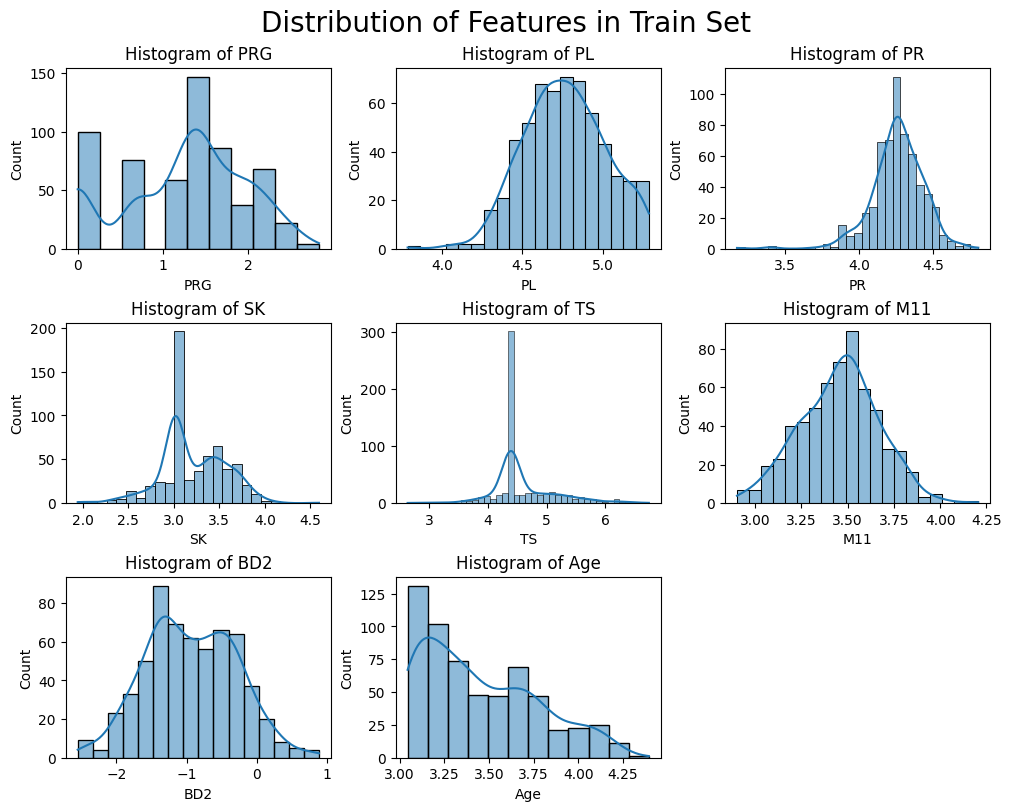

In [122]:
plot_dist(df=train_df, avoid=['Sepsis'], name_for_title='Train')

In [123]:
train_df['TS'] = np.where(train_df['TS'] > train_df['TS'].quantile(0.75),
                                 train_df['TS'].quantile(0.75), train_df['TS'])
train_df['PRG'] = np.where(train_df['PRG'] > train_df['PRG'].quantile(0.75),
                                 train_df['PRG'].quantile(0.75),train_df['PRG'])
train_df['Age'] = np.where(train_df['Age'] > train_df['Age'].quantile(0.75),
                                 train_df['Age'].quantile(0.75),train_df['Age'])

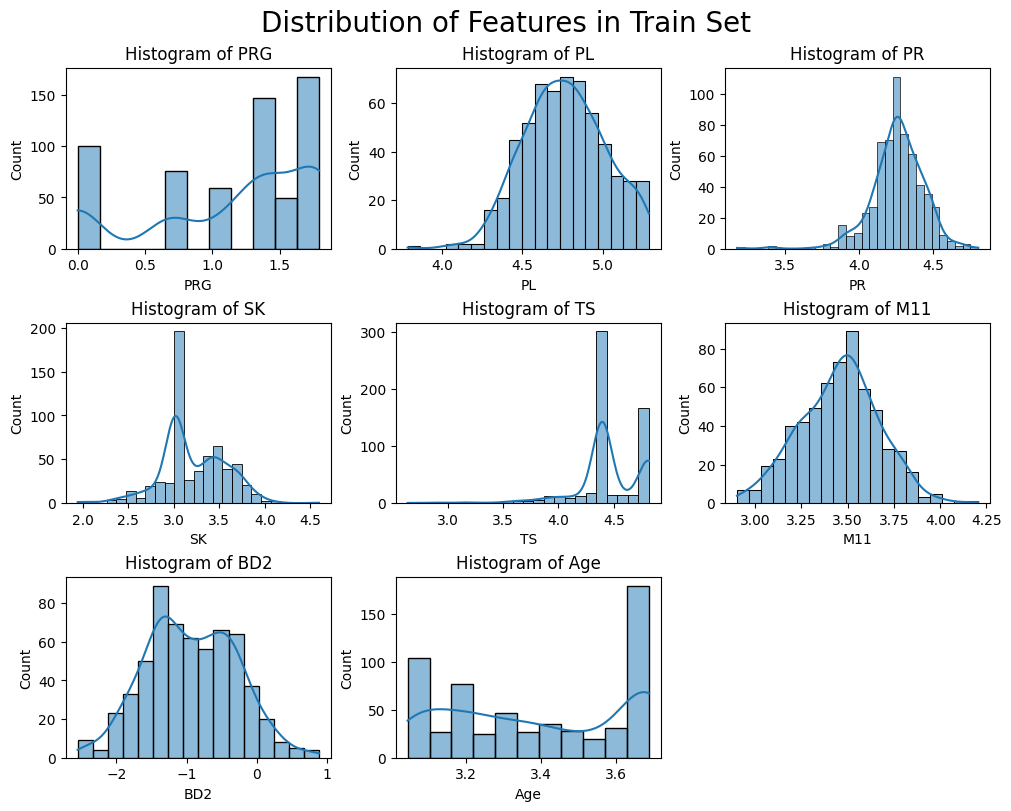

In [124]:
plot_dist(df=train_df, avoid=['Sepsis'], name_for_title='Train')

In [125]:
from imblearn.over_sampling import SMOTE

# Separate the features and target variable
X = train_df.drop('Sepsis', axis=1)
y = train_df['Sepsis']

# Apply SMOTE to upsample the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled features and target variable into a balanced dataset
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

# Print the value counts after balancing the classes
print(balanced_data['Sepsis'].value_counts())

Sepsis
1    391
0    391
Name: count, dtype: int64


In [126]:
balanced_data["Sepsis"].value_counts()

Sepsis
1    391
0    391
Name: count, dtype: int64

## Dataset Splitting

In [127]:
# Use train_test_split with a random_state, and add stratify for Classification
from sklearn.model_selection import train_test_split

X = balanced_data.drop('Sepsis', axis=1)
y = balanced_data.Sepsis

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shape of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (625, 8) (625,)
Test set shape: (157, 8) (157,)


In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Model Training and Evaluation
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# Interpretation of Results
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

print("Feature Importances:")
print(sorted_importances)

print("Accuracy:", accuracy)

Feature Importances:
PL     0.252807
M11    0.188888
Age    0.125021
BD2    0.114426
PR     0.100293
SK     0.081925
TS     0.074712
PRG    0.061928
dtype: float64
Accuracy: 0.8089171974522293


# Machine Learning Modeling
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

Logistic Regression: Logistic regression is a simple and widely used model for binary classification. It models the probability of the target variable belonging to a certain class based on the input features.

Support Vector Machines (SVM): SVM is a powerful model that separates the data into different classes using a hyperplane. It aims to find the best decision boundary that maximizes the margin between the classes.

Random Forest: Random Forest is an ensemble model that combines multiple decision trees to make predictions. It is known for its ability to handle complex relationships and handle high-dimensional data.

Gradient Boosting: Gradient Boosting algorithms, such as XGBoost and LightGBM, are also popular for binary classification. They build an ensemble of weak learners in a sequential manner, where each subsequent model tries to correct the mistakes made by the previous models.

In [129]:
# Define the numeric column names
num_inputs = X_train.columns
num_inputs

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object')

In [130]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.impute import SimpleImputer

# Create the imputer transformer
imputer = SimpleImputer(strategy='mean')


preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), num_inputs),
        #('log_transform', FunctionTransformer(np.log1p), num_inputs),
        ('imputer', imputer, num_inputs)
    ])



In [131]:
X_train.isnull().sum()

PRG    0
PL     0
PR     0
SK     0
TS     0
M11    0
BD2    0
Age    0
dtype: int64

In [132]:
# Find NaN values in the DataFrame
nan_mask = X_train.isna()

# Get the rows with NaN values
rows_with_nan = X_train[nan_mask.any(axis=1)]


In [133]:
# Drop columns with missing values
X_train.dropna(axis=1, inplace=True)
X_test.dropna(axis=1, inplace=True)


In [134]:
X_train.sample()

,PRG,PL,PR,SK,TS,M11,BD2,Age
148,1.609438,4.990433,4.356709,3.017679,4.394449,3.517498,-1.52326,3.688879


In [135]:
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', imputer),
    ('classifier', LogisticRegression())
])

logreg_pipeline.fit(X_train, y_train)


logreg_score = logreg_pipeline.score(X_test, y_test)

In [136]:
# Make predictions on the test data
y_pred = logreg_pipeline.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        79
           1       0.74      0.77      0.75        78

    accuracy                           0.75       157
   macro avg       0.75      0.75      0.75       157
weighted avg       0.75      0.75      0.75       157



In [137]:
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
     ('imputer', imputer),
    ('classifier', SVC())
])


svm_pipeline.fit(X_train, y_train)

svm_score = svm_pipeline.score(X_test, y_test)

In [138]:
# Make predictions on the test data
y_pred = svm_pipeline.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        79
           1       0.75      0.81      0.78        78

    accuracy                           0.77       157
   macro avg       0.77      0.77      0.77       157
weighted avg       0.77      0.77      0.77       157



In [139]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', imputer),
    ('model', RandomForestClassifier())
])

rf_pipeline.fit(X_train, y_train)

rf_score = rf_pipeline.score(X_test, y_test)

In [140]:
# Make predictions on the test data
y_pred = rf_pipeline.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.80      0.77      0.79        79
           1       0.78      0.81      0.79        78

    accuracy                           0.79       157
   macro avg       0.79      0.79      0.79       157
weighted avg       0.79      0.79      0.79       157



In [141]:
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', imputer),
    ('classifier', XGBClassifier())
])

xgb_pipeline.fit(X_train, y_train)

xgb_score = xgb_pipeline.score(X_test, y_test)

In [142]:
# Make predictions on the test data
y_pred = xgb_pipeline.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        79
           1       0.76      0.78      0.77        78

    accuracy                           0.77       157
   macro avg       0.77      0.77      0.77       157
weighted avg       0.77      0.77      0.77       157



In [143]:
lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', imputer),
    ('classifier', LGBMClassifier())
])

lgbm_pipeline.fit(X_train, y_train)

lgbm_score = lgbm_pipeline.score(X_test, y_test)

[LightGBM] [Info] Number of positive: 313, number of negative: 312
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1685
[LightGBM] [Info] Number of data points in the train set: 625, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500800 -> initscore=0.003200
[LightGBM] [Info] Start training from score 0.003200
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [144]:
# Make predictions on the test data
y_pred = lgbm_pipeline.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.78      0.77      0.78        79
           1       0.77      0.78      0.78        78

    accuracy                           0.78       157
   macro avg       0.78      0.78      0.78       157
weighted avg       0.78      0.78      0.78       157



In [145]:
# Define your pipelines and create a dictionary
pipelines = {
    'Logistic Regression': logreg_pipeline,
    'Support Vector Machine': svm_pipeline,
    'Random Forest': rf_pipeline,
    'XGBoost': xgb_pipeline,
    'Light GBM': lgbm_pipeline
}

# Create lists to store data
classifiers = []
precisions = []
accuracies = []
recalls = []
f1_scores = []


In [146]:
# Iterate over each classifier in the pipelines dictionary
for classifier_name, pipeline in pipelines.items():
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate and store classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    classifiers.append(classifier_name)
    accuracies.append(report['accuracy'])
    precisions.append(report['weighted avg']['precision'])
    recalls.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])


[LightGBM] [Info] Number of positive: 313, number of negative: 312
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1685
[LightGBM] [Info] Number of data points in the train set: 625, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500800 -> initscore=0.003200
[LightGBM] [Info] Start training from score 0.003200
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [147]:
# Create a DataFrame
data = {
    "Classifier": classifiers,
    "Precision": precisions,
    "Accuracy": accuracies,
    "Recall": recalls,
    "F1-Score": f1_scores,
}

df = pd.DataFrame(data)

In [148]:
#Sort the DataFrame based on desired metrics
sorted_df = df.sort_values(by=["Precision","Accuracy","F1-Score","Recall"], ascending=False)
sorted_df = sorted_df.reset_index(drop=True)

sorted_df

,Classifier,Precision,Accuracy,Recall,F1-Score
0,Random Forest,0.796404,0.796178,0.796178,0.796162
1,Light GBM,0.777133,0.777070,0.777070,0.777070
2,Support Vector Machine,0.772402,0.770701,0.770701,0.770421
3,XGBoost,0.770914,0.770701,0.770701,0.770682
4,Logistic Regression,0.752021,0.751592,0.751592,0.751532


Based on the results in the table above,we see that the Random Forest model has the highest Precision, Accuracy, Recall, and F1-Score. This suggests that Random Forest is the best performing model for sepsis prediction among the five models evaluated.

##HYPERPARAMETER TUNING

In [149]:
param_grid_rf = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

In [150]:
# Create the GridSearchCV object
grid_search_rf = GridSearchCV(rf_pipeline, param_grid=param_grid_rf, scoring='accuracy', cv=5)

In [151]:
# Fit the GridSearchCV object to the data
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object')),
                                                                        ('imputer',
                                                                         SimpleImputer(),
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object'))])),
                                       ('imputer', SimpleImputer()),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [152]:
# Print the best hyperparameters
print("Best Hyperparameters for Random Forest:",grid_search_rf.best_params_)

Best Hyperparameters for Random Forest: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 50}


In [153]:
# Get the best Random Forest model
rf_model = grid_search_rf.best_estimator_

In [154]:
#view best model
rf_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object')),
                                                 ('imputer', SimpleImputer(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object'))])),
                ('imputer', SimpleImputer()),
                ('model', RandomForestClassifier(n_estimators=50))])

In [155]:
# Evaluate the model on the test set
test_accuracy = rf_model.score(X_test, y_test)

# Round the test accuracy to four significant figures
rounded_test_accuracy = round(test_accuracy, 4)

print("Test Accuracy:", rounded_test_accuracy)

Test Accuracy: 0.7771


SAVING THE MODEL

In [156]:
import joblib

# Save the best model
joblib.dump(rf_model, 'rf_model.joblib')

['rf_model.joblib']

### Predict on a unknown dataset (Testset)

In [157]:
#use the model to predict
submission = rf_model.predict(test)

In [158]:
# Create a DataFrame to store the results
result_df = pd.DataFrame(submission, columns=["Sepsis"])

In [159]:
# Concatenate the original test set and the result DataFrame along the columns
test_sepsis= pd.concat([test, result_df], axis=1)

In [160]:
test_sepsis.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepsis
0,ICU200609,1,109,38,18,120,23.1,0.407,26,0
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [161]:
#Saving the final submission to csv
test_sepsis.to_csv("test_sepsis.csv", index=False)

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [162]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app